<a href="https://colab.research.google.com/github/nescoba/DIP/blob/main/CTMC_scheme_improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [36]:
def intensity(x):
    return 10

v_intens = np.vectorize(intensity)

In [16]:
hPoiss = 0.001
h = 0.01
M = 100
L = 10000*M

In [4]:
y = np.random.choice([0,1], p=[1 - hPoiss, hPoiss], size=(L-1))

Y = pd.Series(np.cumsum(y), index=np.arange(start=hPoiss, stop=L*hPoiss, step=hPoiss))

In [5]:
Y

0.001         0
0.002         0
0.003         0
0.004         0
0.005         0
           ... 
999.995    1012
999.996    1012
999.997    1012
999.998    1012
999.999    1012
Length: 999999, dtype: int64

In [37]:
x = pd.Series([0], index=[0])

for m in range(1, M):
    # argum = 0
    intensities = x.apply(intensity)
    argum = np.sum(intensities.values)*h  
    x_new = Y.iloc[int(argum/hPoiss)]
    x.loc[m*h] = x_new

# for m in range(1, M):
#     argum = 0
#     for n in range(m):
#         argum += intensity(x.loc[n*h])*h    
#     x_new = Y.iloc[int(argum/hPoiss)]
#     x.loc[m*h] = x_new

x

0.00    0
0.01    0
0.02    0
0.03    0
0.04    0
       ..
0.95    9
0.96    9
0.97    9
0.98    9
0.99    9
Length: 100, dtype: int64

In [38]:
N = 5

z = pd.Series([0], index=[0])
for m in range(1, M):
    intensities = x.apply(intensity)
    argum = np.sum(intensities)*h
    # argum = 0
    # for n in range(m):
    #     argum += intensity(x.loc[n*h])*h    
    z_new = Y.iloc[int(argum/hPoiss)*N]
    z.loc[m*h] = z_new

phi = pd.Series(z/N, index=z.index)
phi

0.00    0.0
0.01    9.4
0.02    9.4
0.03    9.4
0.04    9.4
       ... 
0.95    9.4
0.96    9.4
0.97    9.4
0.98    9.4
0.99    9.4
Length: 100, dtype: float64

In [20]:
[x.loc[0.5], (phi.loc[0.5+0.1] - phi.loc[0.5])/0.1]

[3, 0.0]

------

In [83]:
def scheme_corrected():

    y = np.random.choice([0,1], p=[1 - hPoiss, hPoiss], size=(L-1))

    Y = pd.Series(np.cumsum(y), index=np.arange(start=hPoiss, stop=L*hPoiss, step=hPoiss))

    x = pd.Series([0], index=[0])

    for m in range(1, M):
        # argum = 0
        intensities = x.apply(intensity)
        argum = np.sum(intensities.values)*h  
        x_new = Y.iloc[int(argum/hPoiss)]
        x.loc[m*h] = x_new

# for m in range(1, M):
#     argum = 0
#     for n in range(m):
#         argum += intensity(x.loc[n*h])*h    
#     x_new = Y.iloc[int(argum/hPoiss)]
#     x.loc[m*h] = x_new

# x

    # print(x)
    
    N = 10

    z = pd.Series([0], index=[0])
    for m in range(1, M):
        intensities = x.loc[:m*h].apply(intensity)
        # print(intensities)
        argum = np.sum(intensities)*h
        # print(argum)
        # argum = 0
        # for n in range(m):
        #     argum += intensity(x.loc[n*h])*h    
        z_new = Y.iloc[int(argum/hPoiss)*N]
        z.loc[m*h] = z_new

    phi = pd.Series(z/N, index=z.index)
    # print(phi)
    x_list = [x.iloc[int(t/h)] for t in np.arange(start=0.1, stop=0.8, step=0.1)]
    phi_list = [(phi.iloc[int((t+0.1)/h)] - phi.iloc[int(t/h)])/0.1 for t in np.arange(start=0.1, stop=0.8, step=0.1)]
    return pd.DataFrame({'x':x_list, 'lambda': phi_list})

In [84]:
scheme_corrected()

,x,lambda
0,1,16.0
1,1,10.0
2,2,6.0
3,3,7.0
4,3,15.0
5,4,14.0
6,7,9.0


In [85]:
data = pd.DataFrame(columns=['x', 'lambda'])
for n in range(25):
    new_data = scheme_corrected()
    print(n)
    data = pd.concat([data, new_data])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [86]:
data

,x,lambda
0,1,7.0
1,1,17.0
2,1,8.0
3,1,6.0
4,2,12.0
...,...,...
2,2,9.0
3,2,14.0
4,4,9.0
5,4,8.0


In [87]:
info = data.groupby('x')['lambda'].mean()

In [88]:
info

x
0      9.583333
1      9.781250
2     10.666667
3     10.166667
4     10.160000
5     10.933333
6      9.000000
7      9.909091
8     11.571429
9     11.400000
10    10.000000
11    11.000000
12     5.000000
13     5.000000
14    14.000000
Name: lambda, dtype: float64

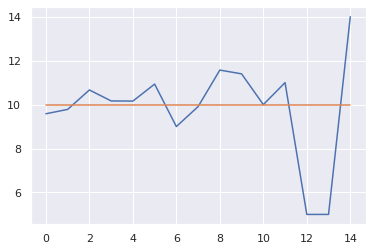

In [89]:
plt.plot(info[:])
plt.plot(info.index, v_intens(info.index))